In [9]:
import sys
sys.path.append('../')

import utils
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd

plt.style.use('../style.mpl')

In [10]:
G = utils.load_network(path="../data/network.pkl")
print(G)

Graph with 1139 nodes and 17908 edges


# Group of nodes

## Cliques
In this section, we explore the concept of **cliques** within the Spotify artist collaboration network. A clique is a subset of nodes where every artist is directly connected to every other artist in the group, forming a completely connected subgraph. These structures often reveal strong collaboration ties or overlapping audience segments among artists.

Total number of cliques: 3043
Largest clique size: 54
Average clique size: 11.96

Clique size distribution:
Cliques of size 2: 35
Cliques of size 3: 113
Cliques of size 4: 144
Cliques of size 5: 139
Cliques of size 6: 176
Cliques of size 7: 184
Cliques of size 8: 147
Cliques of size 9: 162
Cliques of size 10: 214
Cliques of size 11: 269
Cliques of size 12: 252
Cliques of size 13: 262
Cliques of size 14: 182
Cliques of size 15: 148
Cliques of size 16: 119
Cliques of size 17: 68
Cliques of size 18: 45
Cliques of size 19: 48
Cliques of size 20: 50
Cliques of size 21: 23
Cliques of size 22: 39
Cliques of size 23: 33
Cliques of size 24: 37
Cliques of size 25: 28
Cliques of size 26: 22
Cliques of size 27: 8
Cliques of size 28: 24
Cliques of size 29: 18
Cliques of size 30: 5
Cliques of size 31: 2
Cliques of size 32: 2
Cliques of size 33: 4
Cliques of size 34: 7
Cliques of size 35: 5
Cliques of size 37: 9
Cliques of size 38: 8
Cliques of size 39: 3
Cliques of size 40: 3
Cliques of size 41: 2
C

/var/folders/sl/k6wcvvzj05gfs43df8blb4qh0000gn/T/ipykernel_6998/1180720258.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Cliques', y=df_top.index, data=df_top, ax=axes[1],


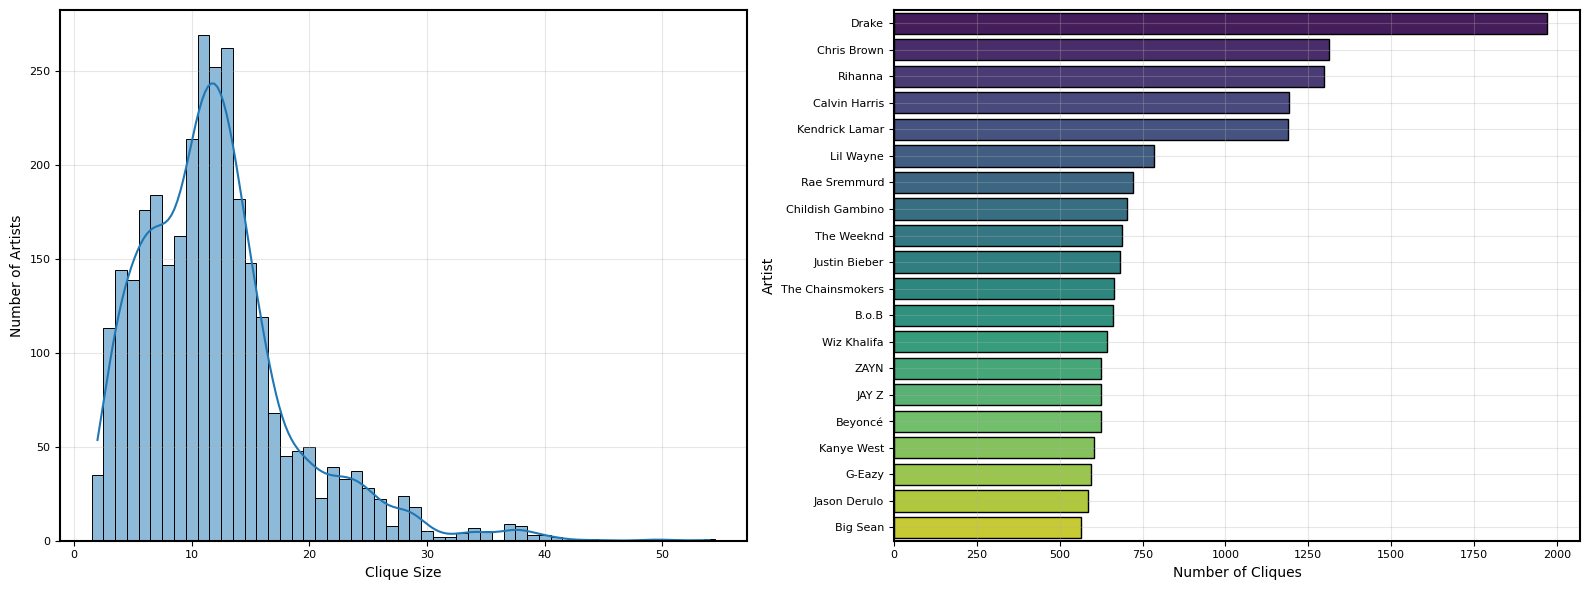


The largest clique contains 54 artists.
The second largest clique contains 50 artists.
The third largest clique contains 49 artists.


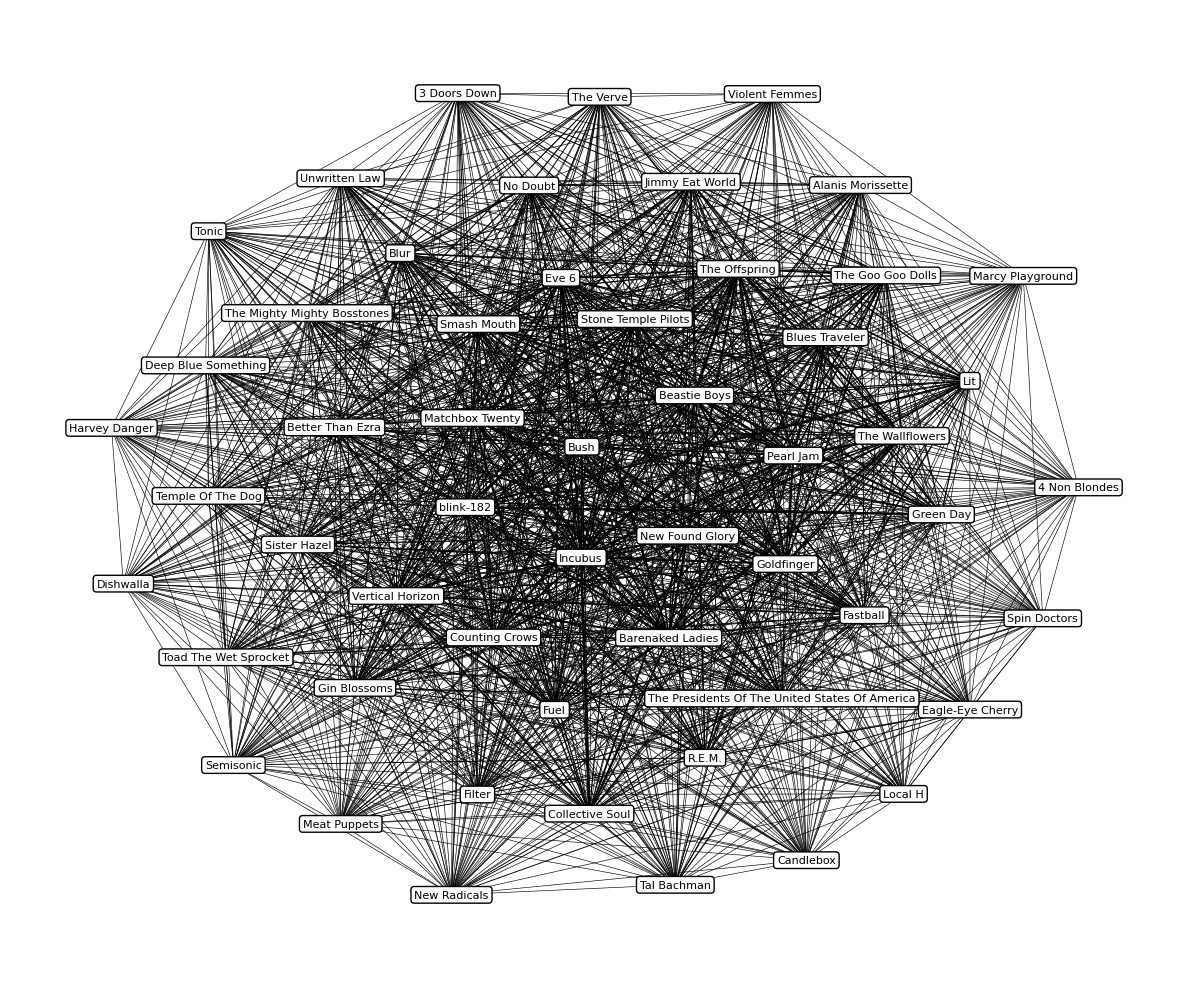

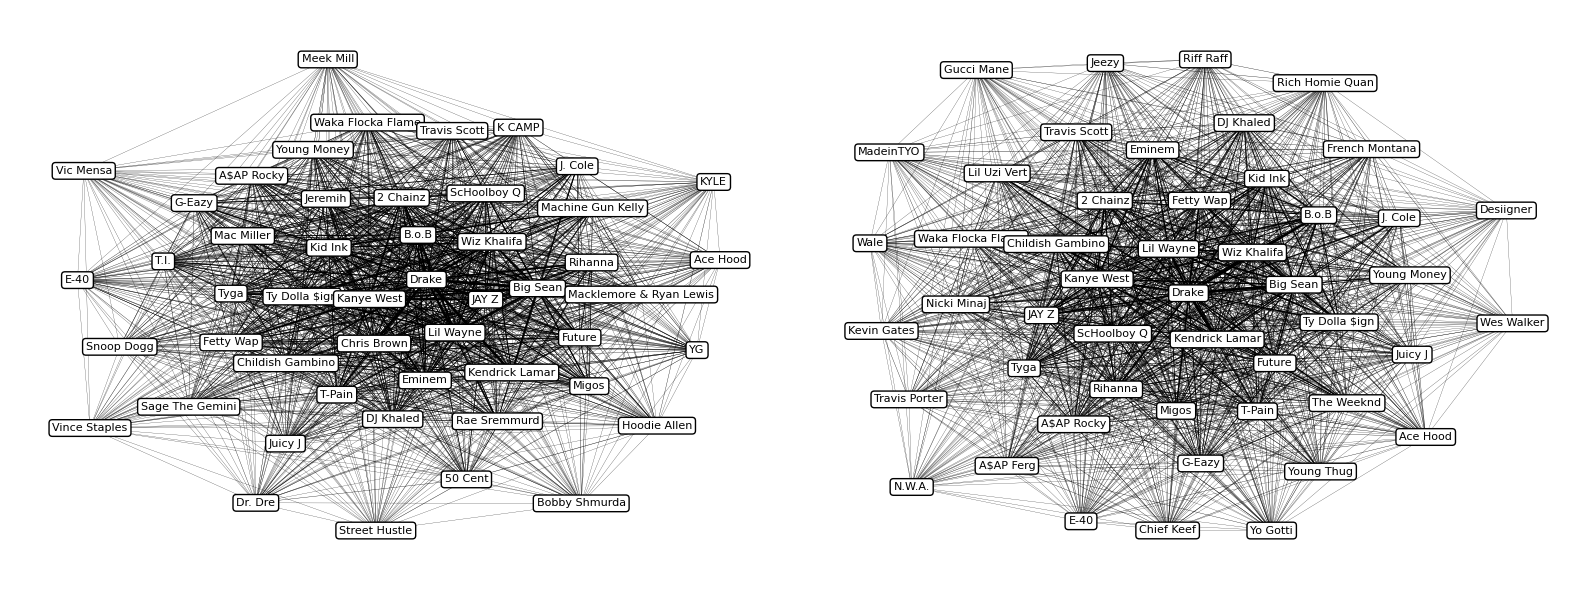


Members of the largest clique:
1. The Goo Goo Dolls
2. Jimmy Eat World
3. Matchbox Twenty
4. Counting Crows
5. R.E.M.
6. Bush
7. Fuel
8. Incubus
9. Eve 6
10. Pearl Jam
11. Beastie Boys
12. Blur
13. The Offspring
14. No Doubt
15. Blues Traveler
16. Smash Mouth
17. The Wallflowers
18. Vertical Horizon
19. Better Than Ezra
20. Goldfinger
21. Barenaked Ladies
22. Alanis Morissette
23. Fastball
24. Collective Soul
25. Gin Blossoms
26. Toad The Wet Sprocket
27. Deep Blue Something
28. Sister Hazel
29. New Found Glory
30. blink-182
31. Unwritten Law
32. The Presidents Of The United States Of America
33. Lit
34. Stone Temple Pilots
35. The Mighty Mighty Bosstones
36. Tal Bachman
37. Green Day
38. Local H
39. Marcy Playground
40. Harvey Danger
41. Filter
42. 3 Doors Down
43. Spin Doctors
44. Candlebox
45. Semisonic
46. Eagle-Eye Cherry
47. Tonic
48. New Radicals
49. Dishwalla
50. Temple Of The Dog
51. 4 Non Blondes
52. Violent Femmes
53. The Verve
54. Meat Puppets

Members of the second larges

In [11]:
cliques = list(nx.find_cliques(G))

clique_sizes = [len(c) for c in cliques]
print(f"Total number of cliques: {len(cliques)}")
print(f"Largest clique size: {max(clique_sizes)}")
print(f"Average clique size: {sum(clique_sizes) / len(clique_sizes):.2f}")

size_counts = Counter(clique_sizes)
print("\nClique size distribution:")
for size, count in sorted(size_counts.items()):
    print(f"Cliques of size {size}: {count}")

artist_clique_count = {}
for clique in cliques:
    for artist in clique:
        artist_clique_count[artist] = artist_clique_count.get(artist, 0) + 1

df_clique_counts = pd.DataFrame(list(artist_clique_count.items()), 
                               columns=['Artist', 'Number of Cliques'])
df_clique_counts = df_clique_count = df_clique_counts.set_index('Artist').sort_values('Number of Cliques', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(clique_sizes, bins=range(min(clique_sizes), max(clique_sizes) + 2), 
             discrete=True, ax=axes[0], kde=True, edgecolor='black')
axes[0].set_xlabel('Clique Size')
axes[0].set_ylabel('Number of Artists')
axes[0].grid(True, alpha=0.3)

top_n = 20 
df_top = df_clique_counts.head(top_n)
sns.barplot(x='Number of Cliques', y=df_top.index, data=df_top, ax=axes[1],
            palette='viridis', edgecolor='black')
axes[1].set_xlabel('Number of Cliques')
axes[1].grid(True, alpha=0.3)
plt.savefig("../plots/combined_clique_analysis.png", transparent=True)
plt.tight_layout()
plt.show()

sorted_cliques = sorted(cliques, key=len, reverse=True)
largest_clique = sorted_cliques[0]  
second_largest_clique = sorted_cliques[1]
third_largest_clique = sorted_cliques[2]

print(f"\nThe largest clique contains {len(largest_clique)} artists.")
print(f"The second largest clique contains {len(second_largest_clique)} artists.")
print(f"The third largest clique contains {len(third_largest_clique)} artists.")

plt.figure(figsize=(12, 10))
largest_clique_subgraph = G.subgraph(largest_clique)
pos = nx.spring_layout(largest_clique_subgraph, seed=42, k=0.6)

edge_weights = [largest_clique_subgraph[u][v]['weight'] for u, v in largest_clique_subgraph.edges()]
max_weight = max(edge_weights) if edge_weights else 1
normalized_weights = [w / max_weight * 2 for w in edge_weights]

nx.draw_networkx_edges(largest_clique_subgraph, pos, edge_color='black', width=normalized_weights)
nx.draw_networkx_labels(
    largest_clique_subgraph, pos, font_size=8, verticalalignment='center',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
)

plt.axis('off')
plt.tight_layout()
plt.savefig("../plots/largest_clique.png", transparent=True)
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

second_clique_subgraph = G.subgraph(second_largest_clique)
pos_second = nx.spring_layout(second_clique_subgraph, seed=43, k=0.6)

edge_weights_second = [second_clique_subgraph[u][v]['weight'] for u, v in second_clique_subgraph.edges()]
max_weight_second = max(edge_weights_second) if edge_weights_second else 1
normalized_weights_second = [w / max_weight_second * 2 for w in edge_weights_second]

nx.draw_networkx_edges(second_clique_subgraph, pos_second, edge_color='black', width=normalized_weights_second, ax=axes[0])
nx.draw_networkx_labels(
    second_clique_subgraph, pos_second, font_size=8, verticalalignment='center',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'),
    ax=axes[0]
)
axes[0].axis('off')

third_clique_subgraph = G.subgraph(third_largest_clique)
pos_third = nx.spring_layout(third_clique_subgraph, seed=44, k=0.6)

edge_weights_third = [third_clique_subgraph[u][v]['weight'] for u, v in third_clique_subgraph.edges()]
max_weight_third = max(edge_weights_third) if edge_weights_third else 1
normalized_weights_third = [w / max_weight_third * 2 for w in edge_weights_third]

nx.draw_networkx_edges(third_clique_subgraph, pos_third, edge_color='black', width=normalized_weights_third, ax=axes[1])
nx.draw_networkx_labels(
    third_clique_subgraph, pos_third, font_size=8, verticalalignment='center',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'),
    ax=axes[1]
)
axes[1].axis('off')

plt.tight_layout()
plt.savefig("../plots/second_third_largest_cliques.png", transparent=True)
plt.show()

print(f"\nMembers of the largest clique:")
for i, artist in enumerate(largest_clique, 1):
    print(f"{i}. {artist}")

print(f"\nMembers of the second largest clique:")
for i, artist in enumerate(second_largest_clique, 1):
    print(f"{i}. {artist}")

print(f"\nMembers of the third largest clique:")
for i, artist in enumerate(third_largest_clique, 1):
    print(f"{i}. {artist}")

# K-Cores
The k-core is a flexible grouping notion in network analysis. Unlike a clique where each node connects to all others, a k-core is a connected set of nodes where each connects to at least k others in the set,  they are useful because they are relatively easy to identify.

The maximum k-core in the network is: 53

Distribution of core numbers:
Core number 1: 23 nodes
Core number 2: 33 nodes
Core number 3: 26 nodes
Core number 4: 22 nodes
Core number 5: 39 nodes
Core number 6: 37 nodes
Core number 7: 28 nodes
Core number 8: 21 nodes
Core number 9: 24 nodes
Core number 10: 32 nodes
Core number 11: 20 nodes
Core number 12: 22 nodes
Core number 13: 9 nodes
Core number 14: 15 nodes
Core number 15: 21 nodes
Core number 16: 21 nodes
Core number 17: 30 nodes
Core number 18: 71 nodes
Core number 19: 15 nodes
Core number 20: 33 nodes
Core number 21: 26 nodes
Core number 22: 7 nodes
Core number 23: 21 nodes
Core number 24: 86 nodes
Core number 25: 72 nodes
Core number 26: 38 nodes
Core number 27: 60 nodes
Core number 29: 7 nodes
Core number 30: 32 nodes
Core number 31: 40 nodes
Core number 32: 1 nodes
Core number 33: 33 nodes
Core number 34: 11 nodes
Core number 35: 2 nodes
Core number 36: 1 nodes
Core number 37: 3 nodes
Core number 39: 6 nodes
Core number 40: 1 no

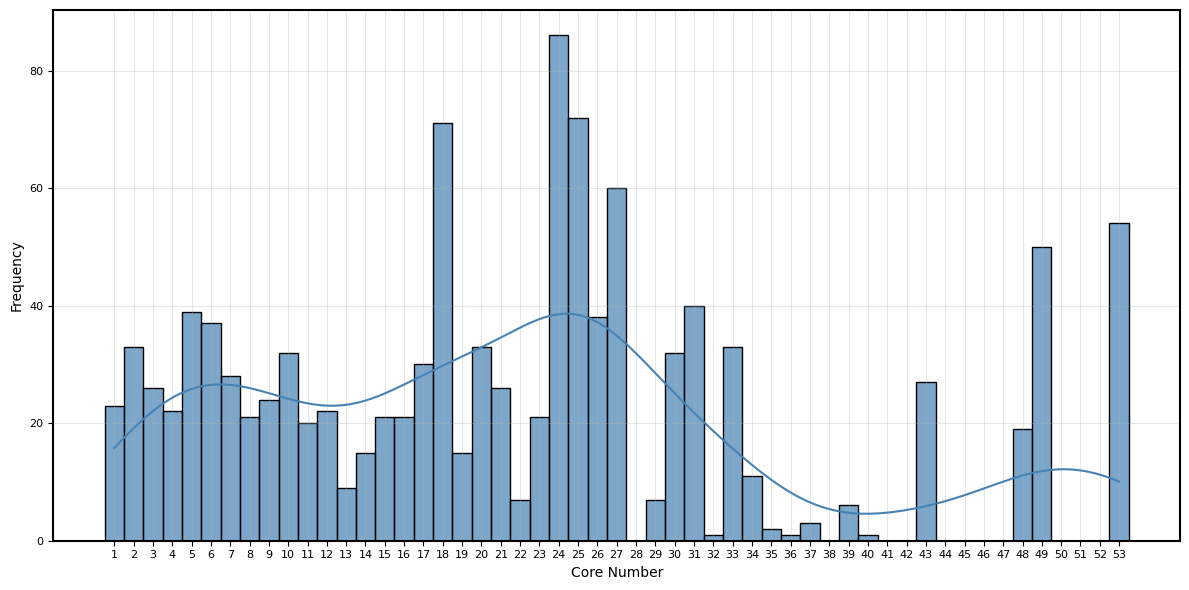


The 53-core contains 54 nodes and 1431 edges


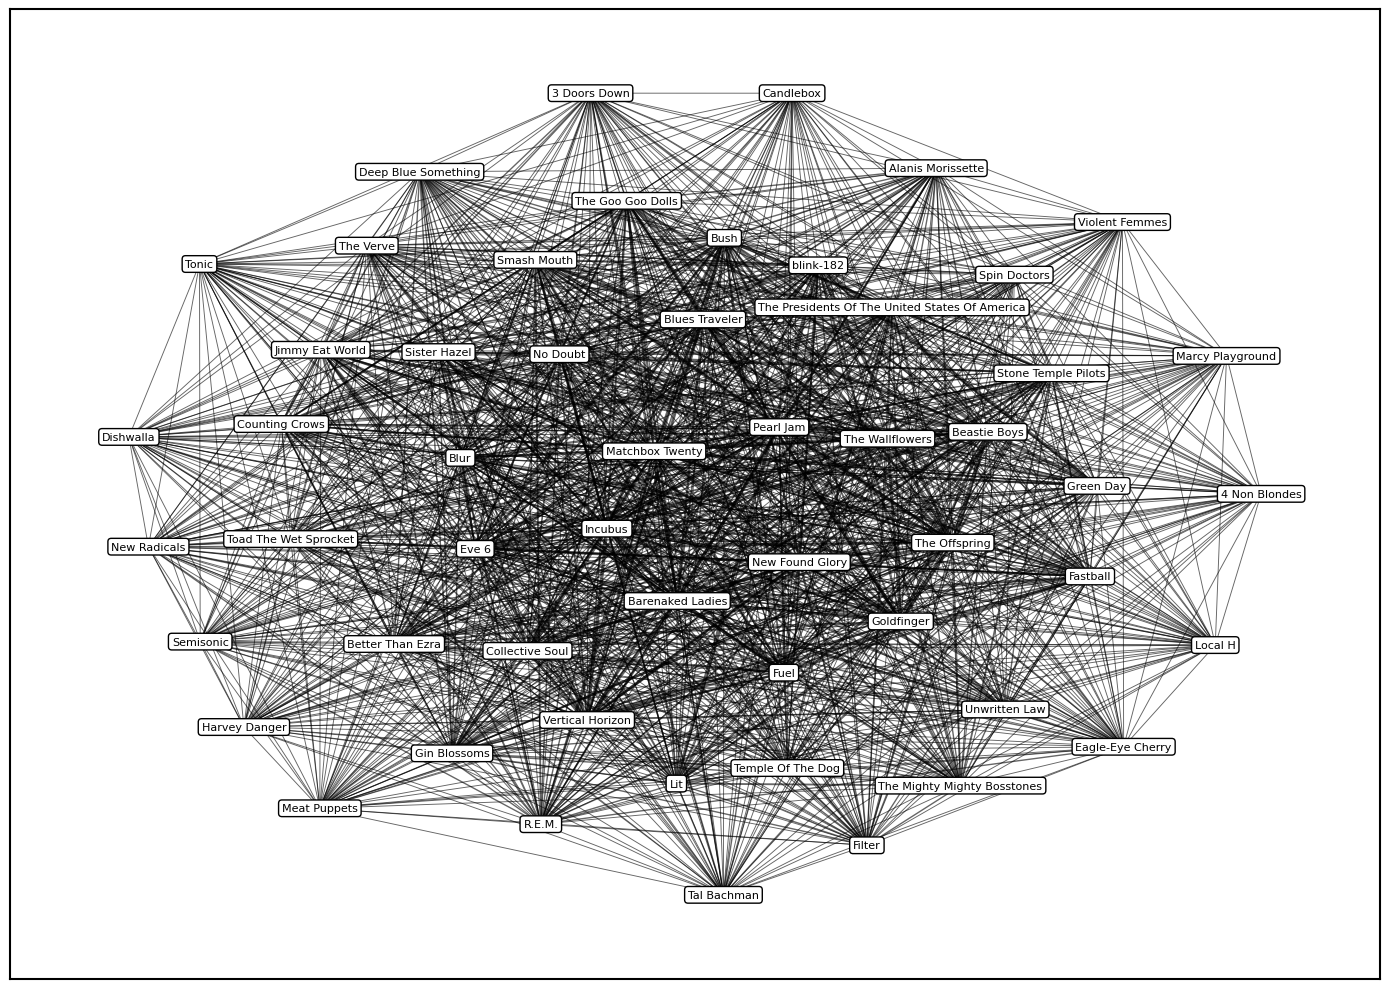

<Figure size 1600x1200 with 0 Axes>

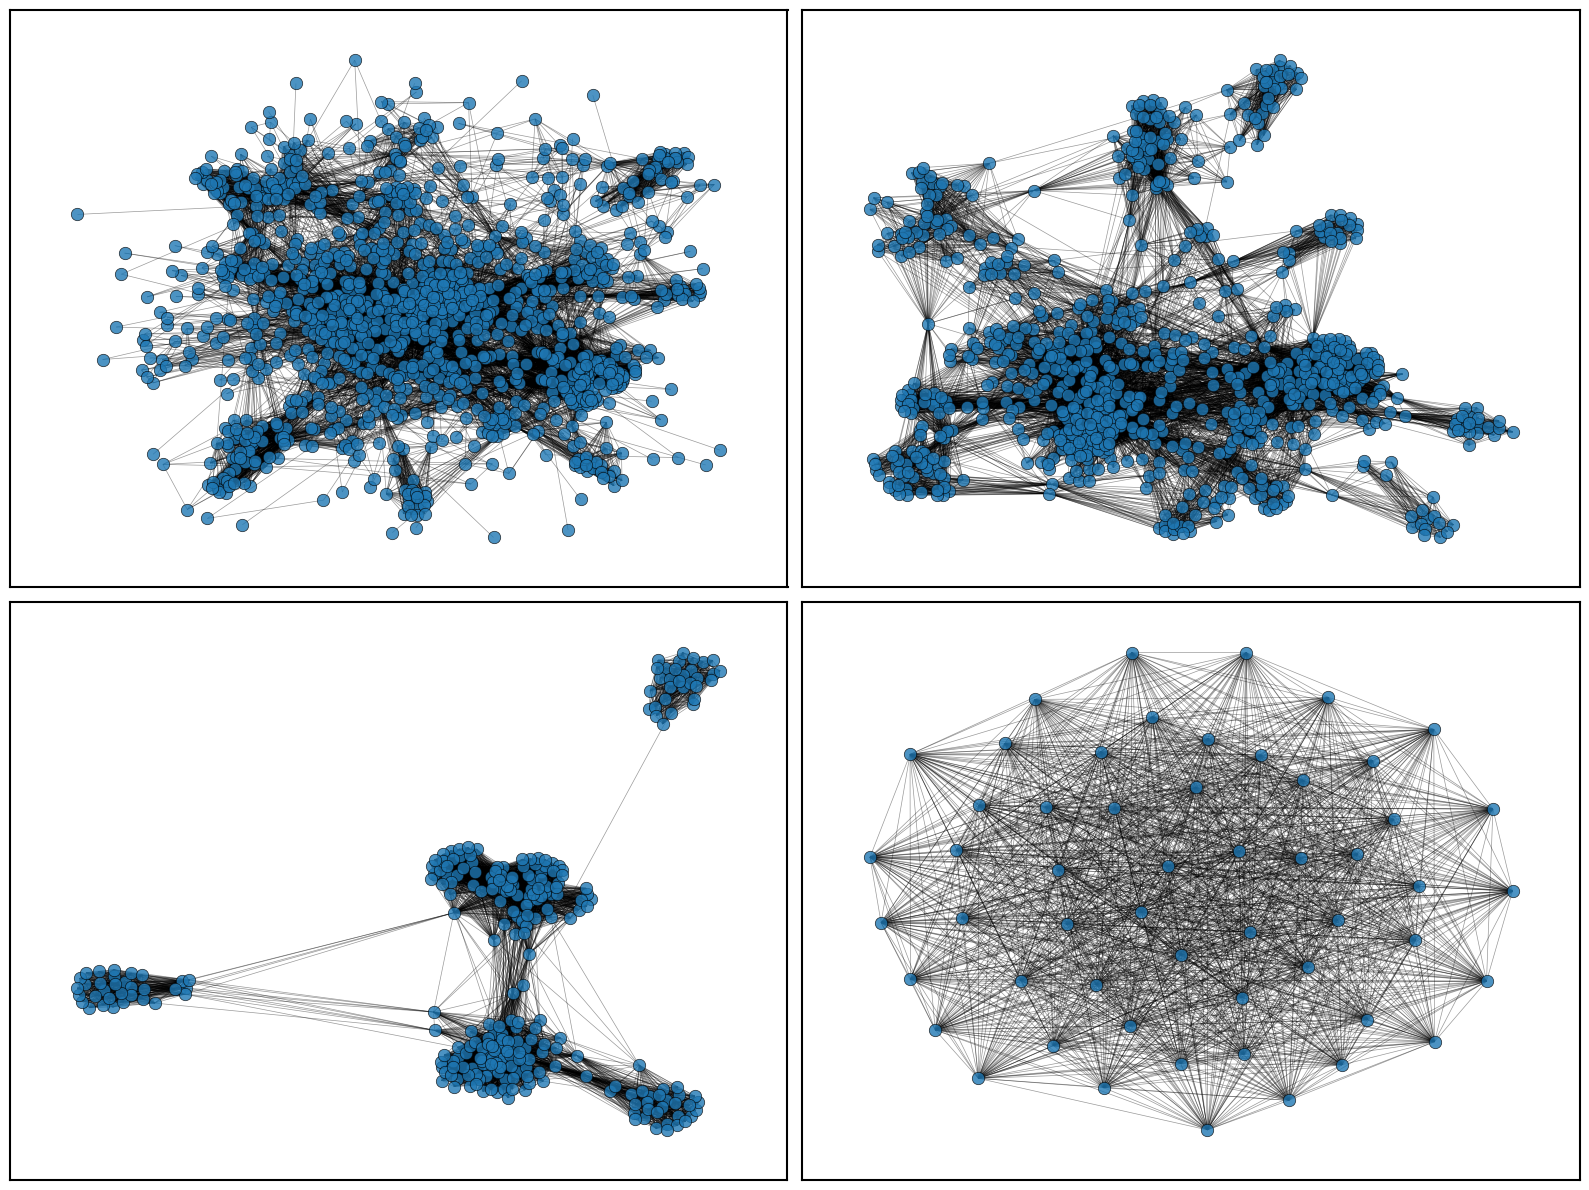


Network robustness analysis:
Maximum core number: 53
Average core number: 22.12
Nodes in the maximum k-core: 54
Percentage of nodes in the maximum k-core: 4.74%


In [12]:
core_numbers = nx.core_number(G)
max_core = max(core_numbers.values())
print(f"The maximum k-core in the network is: {max_core}")

core_counts = Counter(core_numbers.values())
print("\nDistribution of core numbers:")
for k, count in sorted(core_counts.items()):
    print(f"Core number {k}: {count} nodes")

df_core = pd.DataFrame(list(core_numbers.items()), columns=['Artist', 'Core Number'])
df_core = df_core.sort_values('Core Number', ascending=False)

all_core_numbers = list(core_numbers.values())

plt.figure(figsize=(12, 6))

sns.histplot(all_core_numbers, 
             bins=range(min(all_core_numbers), max(all_core_numbers) + 2),
             discrete=True, 
             kde=True, 
             edgecolor='black',
             alpha=0.7,
             color='steelblue')

plt.xlabel('Core Number')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.xticks(range(min(all_core_numbers), max(all_core_numbers) + 1))
plt.tight_layout()
plt.savefig('../plots/core_number_distribution.png', transparent=True)
plt.show()


kcore_max = nx.k_core(G, k=max_core)
print(f"\nThe {max_core}-core contains {len(kcore_max.nodes())} nodes and {len(kcore_max.edges())} edges")
plt.figure(figsize=(14, 10))
pos_max_core = nx.spring_layout(kcore_max, seed=42, k=0.3)

edge_weights = [kcore_max[u][v]['weight'] for u, v in kcore_max.edges()]
max_weight = max(edge_weights) if edge_weights else 1
normalized_weights = [w / max_weight * 3 for w in edge_weights]

nx.draw_networkx_nodes(kcore_max, pos_max_core, node_size=100,
                      node_color='lightblue', alpha=0.8, 
                      edgecolors='black', linewidths=0.5)

nx.draw_networkx_edges(kcore_max, pos_max_core, 
                      width=normalized_weights, alpha=0.6,
                      edge_color='black')

labels = {n: n for n in kcore_max.nodes()}
nx.draw_networkx_labels(kcore_max, pos_max_core, labels=labels, font_size=8,
                       bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

plt.tight_layout()
plt.savefig('../plots/max_kcore.png', transparent=True)
plt.show()

plt.figure(figsize=(16, 12))
if len(G) > 200:
    top_nodes = [node for node, _ in sorted(core_numbers.items(), 
                                           key=lambda x: x[1], 
                                           reverse=True)[:200]]
    subgraph = G.subgraph(top_nodes)
else:
    subgraph = G

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

k_values = sorted(set(core_numbers.values()))
if len(k_values) > 4:
    k_values = [k_values[0], k_values[len(k_values)//3], k_values[2*len(k_values)//3], k_values[-1]]

for i, k in enumerate(k_values):
    k_core = nx.k_core(G, k=k)
    pos_k = nx.spring_layout(k_core, seed=42, k=0.3)
    
    nx.draw_networkx_nodes(k_core, pos_k, node_size=80,
                          alpha=0.8, 
                          edgecolors='black', linewidths=0.5,
                          ax=axes[i])
    
    nx.draw_networkx_edges(k_core, pos_k, alpha=0.4, width=0.5, edge_color='black', ax=axes[i])
    
    if len(k_core) <= 30:
        labels = {n: n for n in k_core.nodes()}
        nx.draw_networkx_labels(k_core, pos_k, labels=labels, font_size=8,
                              bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'),
                              ax=axes[i])
    

plt.tight_layout()
plt.savefig("../plots/multiple_k_cores.png", transparent=True)
plt.show()

core_numbers_list = list(core_numbers.values())
avg_core = sum(core_numbers_list) / len(core_numbers_list)

print(f"\nNetwork robustness analysis:")
print(f"Maximum core number: {max_core}")
print(f"Average core number: {avg_core:.2f}")
print(f"Nodes in the maximum k-core: {len(kcore_max.nodes())}")
print(f"Percentage of nodes in the maximum k-core: {len(kcore_max.nodes()) / len(G.nodes()) * 100:.2f}%")